In [1]:
import matplotlib.image as mpimg
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot  as plt

import cv2

In [2]:
mass_train = pd.read_csv('./Data/Cleaned csv/Mass train cleaned.csv')
calc_train = pd.read_csv('./Data/Cleaned csv/Calc train cleaned.csv')

In [17]:
def display_images(df,column, number):
    # create figure and axes
    number_to_visualize = number
    max_columns = 5
    max_rows = 2
    rows = min(max_rows, -(-number_to_visualize // max_columns))
    cols = min(max_columns, number_to_visualize)
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))

    # Loop through rows and display images
    for index, row in df.head(number_to_visualize).iterrows():
        image_path = row[column]
        # Check if the file exists
        if os.path.exists(image_path):
            image = mpimg.imread(image_path)
            print(image.shape)
            if rows == 1:
                ax = axes[index % cols]
            else:
                ax = axes[index // cols, index % cols]
            ax.imshow(image, cmap='gray')
            ax.set_title(f"{row['pathology']}")
            ax.axis('off')
        else:
            print(f"File not found: {image_path}")

    plt.tight_layout()
    plt.show()


Mass Training Dataset

Full Mammograms:
(4808, 3024)
(4800, 2656)
(5491, 2986)
(5491, 3046)
(5491, 2911)
(4441, 2206)
(5266, 2596)
(5552, 4000)
(4720, 2584)
(4664, 2544)


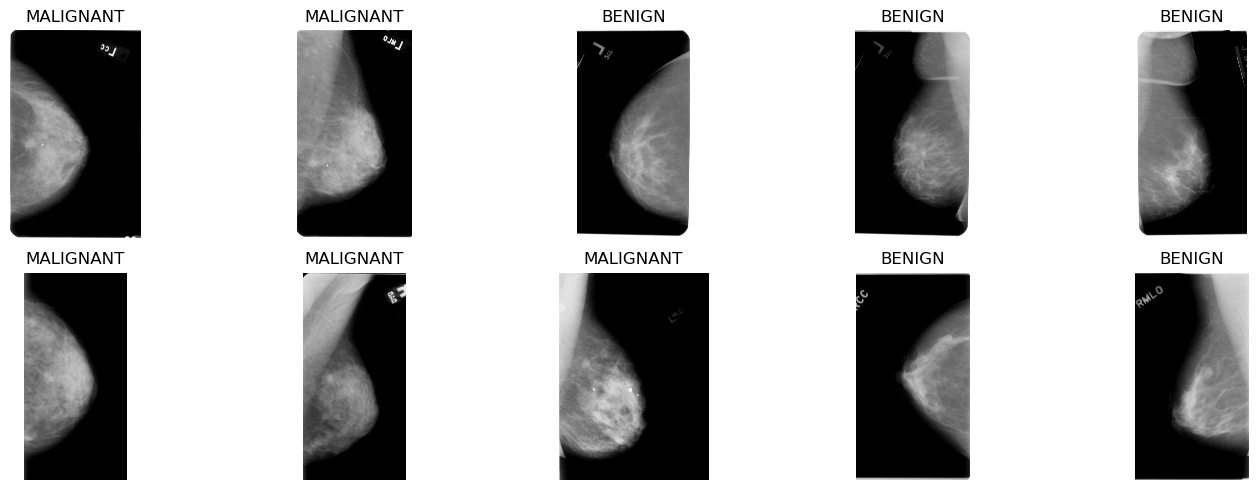

In [18]:
# Assuming mass_train is defined elsewhere in your code
# If not, replace mass_train with your actual DataFrame

print('Mass Training Dataset\n')
print('Full Mammograms:')
display_images(mass_train,'image_file_path', 10)

# print('Cropped Mammograms:\n')
# display_images(mass_train,'cropped_image_file_path', 10)
# print('ROI Images:\n')
# display_images(mass_train,'ROI_mask_file_path', 10)

Calc Training Dataset

Full Mammograms:


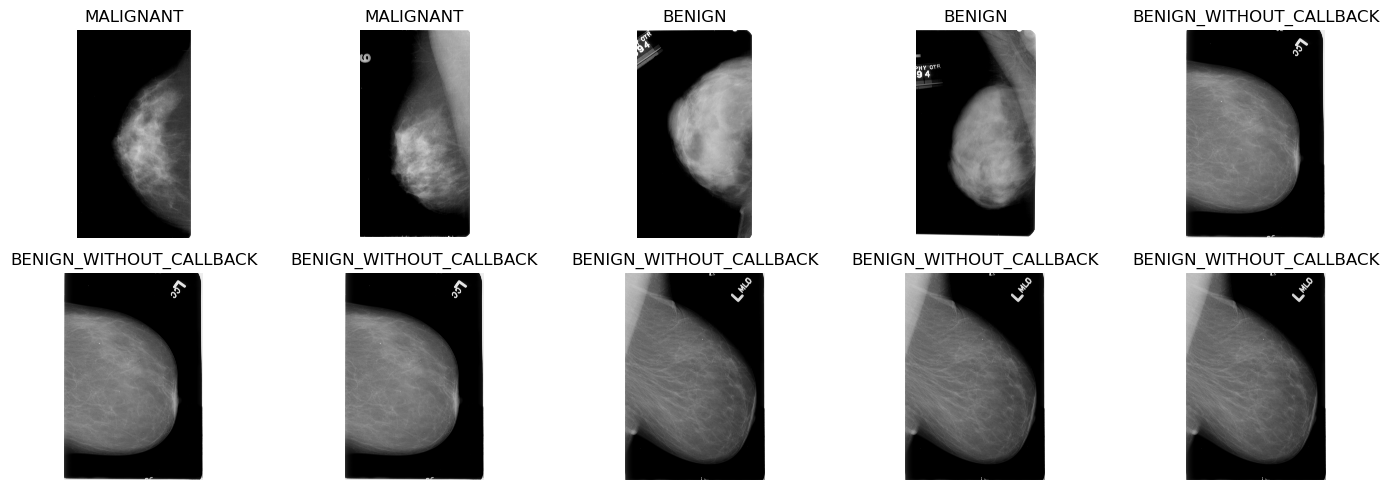

In [14]:
print('Calc Training Dataset\n')
print('Full Mammograms:')
display_images(calc_train,'image_file_path', 10)
# print('Cropped Mammograms:\n')
# display_images(calc_train,'cropped_image_file_path', 10)
# print('ROI Images:\n')
# display_images(calc_train,'ROI_mask_file_path', 10)

## Image Enhancement use of CLAHE(Contrast Limited Adaptive Histogram Equalization)

In [6]:
def image_processor(image_page):
    # absoluate path to image
    abs_image_path = os.path.abspath(image_page)
    # Reading the image from the present directory
    image = cv2.imread(abs_image_path)
    # Resizing the image for compatibility
    image = cv2.resize(image, (512, 512))
     
    # The initial processing of the image
    # image = cv2.medianBlur(image, 3)
    image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # The declaration of CLAHE
    # clipLimit -> Threshold for contrast limiting
    clahe = cv2.createCLAHE(clipLimit=5)
    final_img = clahe.apply(image_bw) + 30
    image_array = final_img/255
    return image_array

In [7]:
mass_train['processed_images'] = mass_train['image_file_path'].apply(lambda x: image_processor(x))

In [8]:
calc_train['processed_images'] = calc_train['image_file_path'].apply(lambda x: image_processor(x))

In [9]:
# Function to display enhanced images
def show_enhanced_images(images, nrows=2, ncols=5):
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')
    plt.show()


Mass Training Dataset


Full Mammograms Enhanced Images:



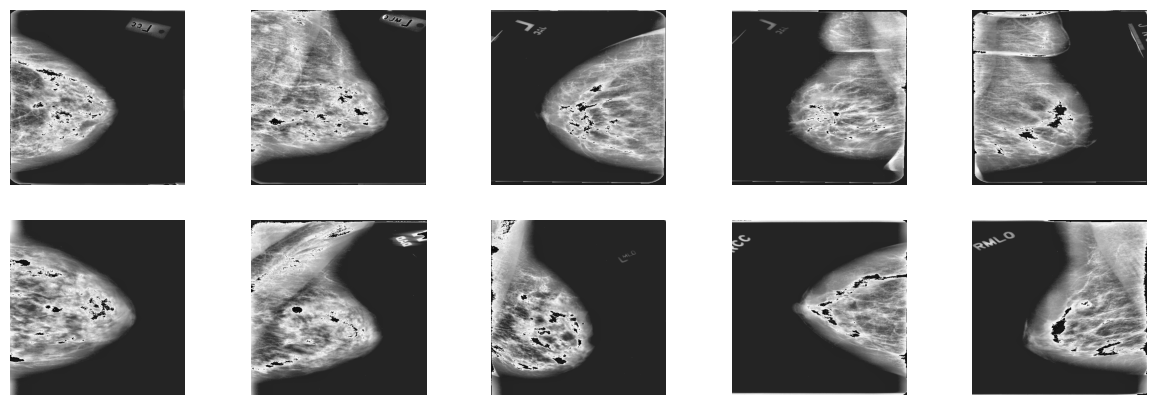

In [10]:
print('Mass Training Dataset\n\n')
print('Full Mammograms Enhanced Images:\n')
# Show enhanced images
show_enhanced_images(mass_train['processed_images'].tolist())

Calc Training Dataset


Full Mammograms Enhanced Images:



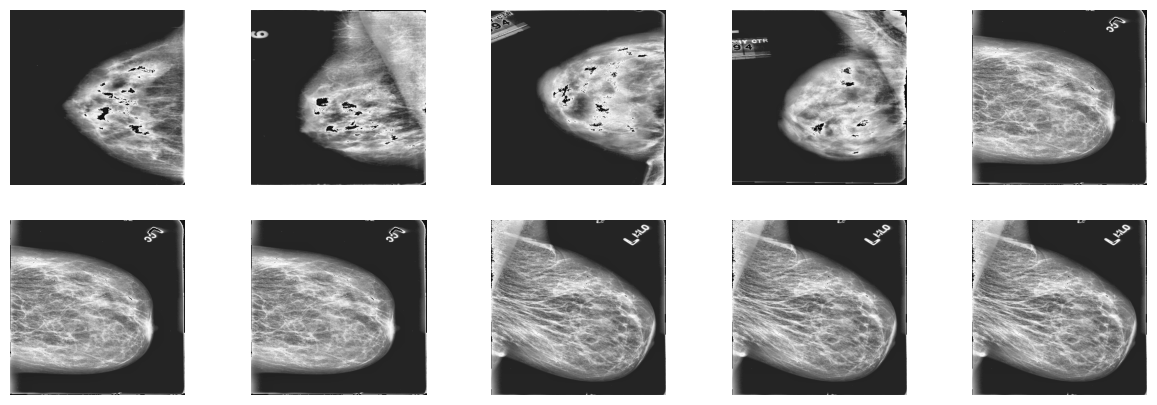

In [11]:
print('Calc Training Dataset\n\n')
print('Full Mammograms Enhanced Images:\n')
# Show enhanced images
show_enhanced_images(calc_train['processed_images'].tolist())

In [12]:
# column_list = ['image_file_path','processed_images','pathology']
# mass_train[column_list].to_csv('./Data/Cleaned csv/Mass train enhanced images.csv', index=False)  
# calc_train[column_list].to_csv('./Data/Cleaned csv/Calc train enhanced images.csv', index=False) 